<a href="https://www.kaggle.com/code/apurvachavan12/time-series-forecasting-for-energy-consumption?scriptVersionId=153376270" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hourly-energy-consumption/est_hourly.paruqet
/kaggle/input/hourly-energy-consumption/DOM_hourly.csv
/kaggle/input/hourly-energy-consumption/EKPC_hourly.csv
/kaggle/input/hourly-energy-consumption/DUQ_hourly.csv
/kaggle/input/hourly-energy-consumption/DAYTON_hourly.csv
/kaggle/input/hourly-energy-consumption/PJME_hourly.csv
/kaggle/input/hourly-energy-consumption/PJM_Load_hourly.csv
/kaggle/input/hourly-energy-consumption/NI_hourly.csv
/kaggle/input/hourly-energy-consumption/FE_hourly.csv
/kaggle/input/hourly-energy-consumption/COMED_hourly.csv
/kaggle/input/hourly-energy-consumption/AEP_hourly.csv
/kaggle/input/hourly-energy-consumption/pjm_hourly_est.csv
/kaggle/input/hourly-energy-consumption/DEOK_hourly.csv
/kaggle/input/hourly-energy-consumption/PJMW_hourly.csv


# ***Data Preprocessing:***

In [2]:
import pandas as pd

# Load the dataset from Kaggle, setting the "Datetime" column as the index and parsing it as dates
data = pd.read_csv('/kaggle/input/hourly-energy-consumption/PJME_hourly.csv', index_col=[0], parse_dates=[0])

# Display the first few rows of the dataset
print("First Few Rows:")
print(data.head())

# Display the last few rows of the dataset
print("\nLast Few Rows:")
print(data.tail())


First Few Rows:
                     PJME_MW
Datetime                    
2002-12-31 01:00:00  26498.0
2002-12-31 02:00:00  25147.0
2002-12-31 03:00:00  24574.0
2002-12-31 04:00:00  24393.0
2002-12-31 05:00:00  24860.0

Last Few Rows:
                     PJME_MW
Datetime                    
2018-01-01 20:00:00  44284.0
2018-01-01 21:00:00  43751.0
2018-01-01 22:00:00  42402.0
2018-01-01 23:00:00  40164.0
2018-01-02 00:00:00  38608.0


In [3]:
# Check the column names in your DataFrame
column_names = data.columns
print("Column Names:", column_names)


Column Names: Index(['PJME_MW'], dtype='object')


In [4]:
# Check for missing values in the "PJME_MW" column
missing_values = data['PJME_MW'].isnull().sum()

# Print the count of missing values
print("Number of Missing Values in 'PJME_MW' column:", missing_values)



Number of Missing Values in 'PJME_MW' column: 0


In [5]:
# Resample to daily data by computing the daily mean
daily_data = data.resample('D').mean()

# Print the first few rows of the resampled data
print(daily_data.head())

                 PJME_MW
Datetime                
2002-01-01  31080.739130
2002-01-02  34261.541667
2002-01-03  34511.875000
2002-01-04  33715.458333
2002-01-05  30405.125000


***Create Lag Features:** * 

Lag features capture autocorrelation by including previous values of the target variable "AEP_MW" as features.

In [6]:
# Create lag features for 1 hour, 2 hours, and 3 hours
data['AEP_MW_Lag1'] = data['PJME_MW'].shift(1)
data['AEP_MW_Lag2'] = data['PJME_MW'].shift(2)
data['AEP_MW_Lag3'] = data['PJME_MW'].shift(3)

# Drop rows with missing values in the lag features
data.dropna(inplace=True)

# Print the DataFrame with lag features
print(data.head())


                     PJME_MW  AEP_MW_Lag1  AEP_MW_Lag2  AEP_MW_Lag3
Datetime                                                           
2002-12-31 04:00:00  24393.0      24574.0      25147.0      26498.0
2002-12-31 05:00:00  24860.0      24393.0      24574.0      25147.0
2002-12-31 06:00:00  26222.0      24860.0      24393.0      24574.0
2002-12-31 07:00:00  28702.0      26222.0      24860.0      24393.0
2002-12-31 08:00:00  30698.0      28702.0      26222.0      24860.0


***Extract Time-Based Features*:**

Extracting time-based features allows you to capture patterns related to the time of day, day of the week, or seasonality. 

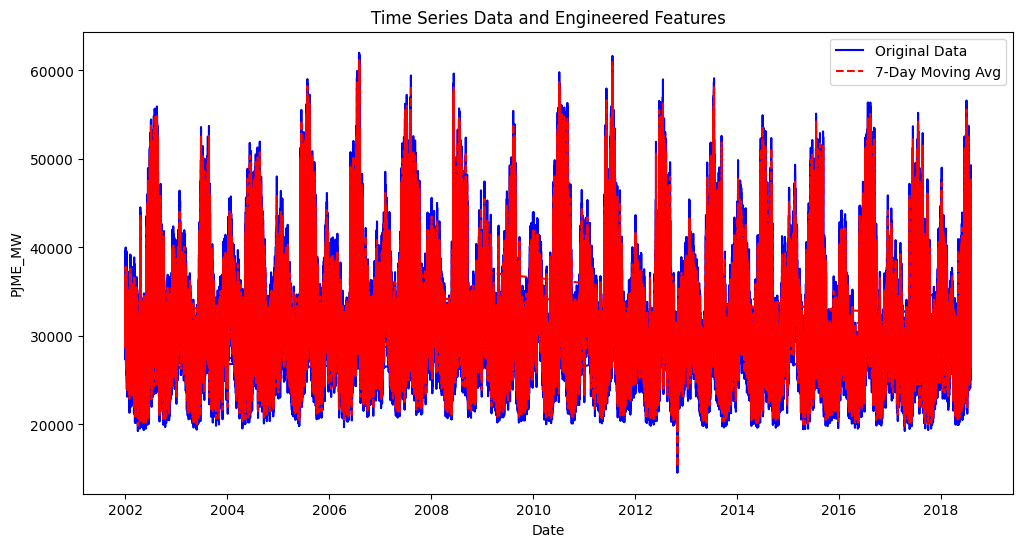

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the time series data (assuming you already have the data loaded)
# data = pd.read_csv('your_dataset.csv', index_col=[0], parse_dates=[0])

# Extract day of the week and hour of the day
data['DayOfWeek'] = data.index.dayofweek  # Monday=0, Sunday=6
data['HourOfDay'] = data.index.hour

# Extract month and year
data['Month'] = data.index.month
data['Year'] = data.index.year

# Extract quarter
data['Quarter'] = data.index.quarter

# Extract week of the year
data['WeekOfYear'] = data.index.isocalendar().week

# Create binary holiday indicator (replace 'your_holiday_date' with an actual date)
data['IsHoliday'] = (data.index.date == 'your_holiday_date').astype(int)

# Calculate 7-day and 30-day moving averages
data['7DayMovingAvg'] = data['PJME_MW'].rolling(window=7).mean()
data['30DayMovingAvg'] = data['PJME_MW'].rolling(window=30).mean()

# Calculate cyclical features for day of the week
data['DayOfWeekSin'] = np.sin(2 * np.pi * data['DayOfWeek'] / 6)
data['DayOfWeekCos'] = np.cos(2 * np.pi * data['DayOfWeek'] / 6)

# Visualize time series data
plt.figure(figsize=(12, 6))

# Plot the original time series data
plt.plot(data.index, data['PJME_MW'], label='Original Data', color='blue')

# Plot some of the engineered features for illustration (e.g., 7-day moving average)
plt.plot(data.index, data['7DayMovingAvg'], label='7-Day Moving Avg', color='red', linestyle='--')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('PJME_MW')
plt.title('Time Series Data and Engineered Features')
plt.legend()

# Show the plot
plt.show()


# ***Exploratory Data Analysis (EDA)***

**Decompose the Time Series:**

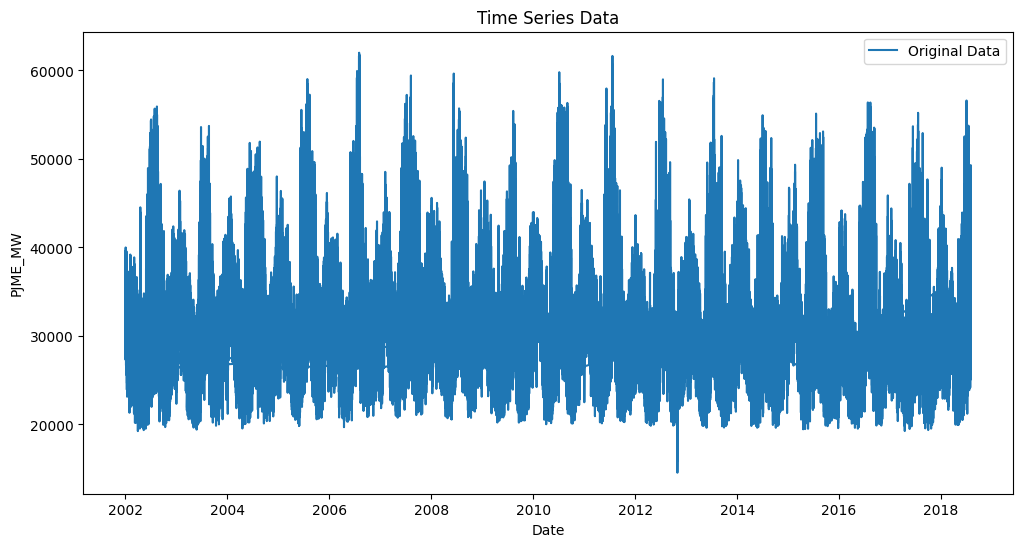

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


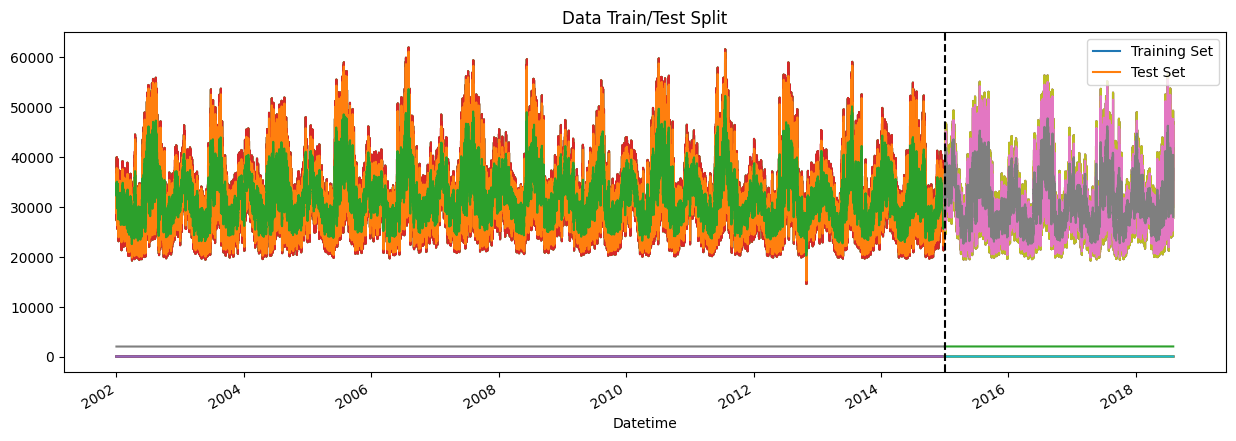

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['PJME_MW'], label='Original Data')
plt.xlabel('Date')
plt.ylabel('PJME_MW')  # Replace with the correct column name if needed
plt.title('Time Series Data')
plt.legend()
plt.show()

train = data.loc[data.index < '01-01-2015']
test = data.loc[data.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()


/tmp/ipykernel_20/1741646912.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date_numeric'] = (train.index - train.index.min()).days
/tmp/ipykernel_20/1741646912.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date_numeric'] = (test.index - train.index.min()).days
/tmp/ipykernel_20/1741646912.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Root Mean Squared Error (RMSE): 6933.449249719269


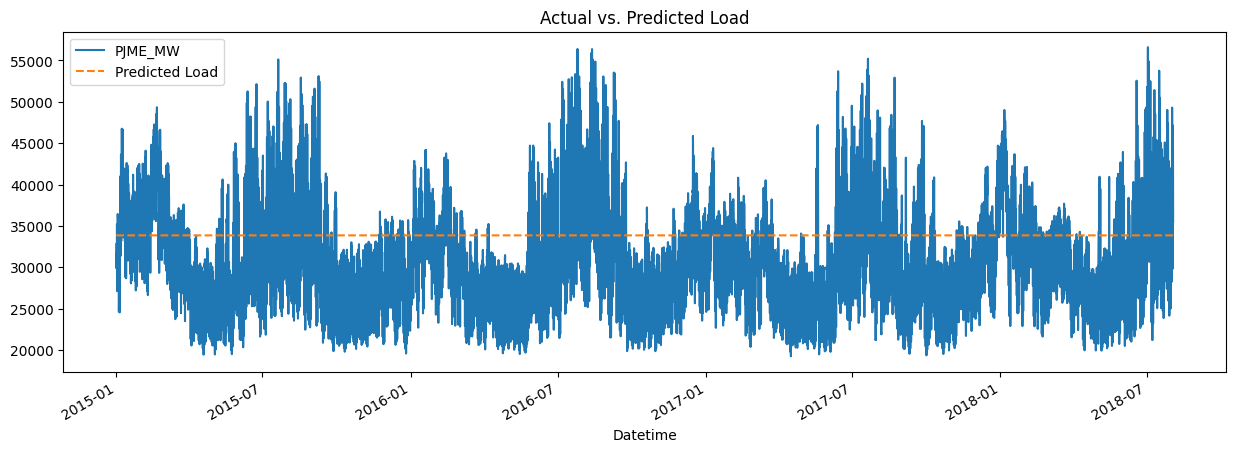

In [9]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Convert the date index to numerical representation (e.g., days since the start)
train['date_numeric'] = (train.index - train.index.min()).days
test['date_numeric'] = (test.index - train.index.min()).days

# Create an XGBoost regressor instance (you can tune hyperparameters)
model = xgb.XGBRegressor()

# Train the model on the training data
X_train = train['date_numeric'].values.reshape(-1, 1)
y_train = train['PJME_MW']
model.fit(X_train, y_train)

# Make predictions on the test set
X_test = test['date_numeric'].values.reshape(-1, 1)
test['prediction'] = model.predict(X_test)

# Calculate RMSE as an example of evaluation metric
rmse = mean_squared_error(test['PJME_MW'], test['prediction'], squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualization (plot actual vs. predicted)
fig, ax = plt.subplots(figsize=(15, 5))
test[['PJME_MW']].plot(ax=ax, label='Actual Load')
test['prediction'].plot(ax=ax, label='Predicted Load', linestyle='--')
ax.legend()
plt.title('Actual vs. Predicted Load')
plt.show()


# **Short-Term Energy Consumption Prediction**

Root Mean Squared Error (RMSE): 5347.393410240783


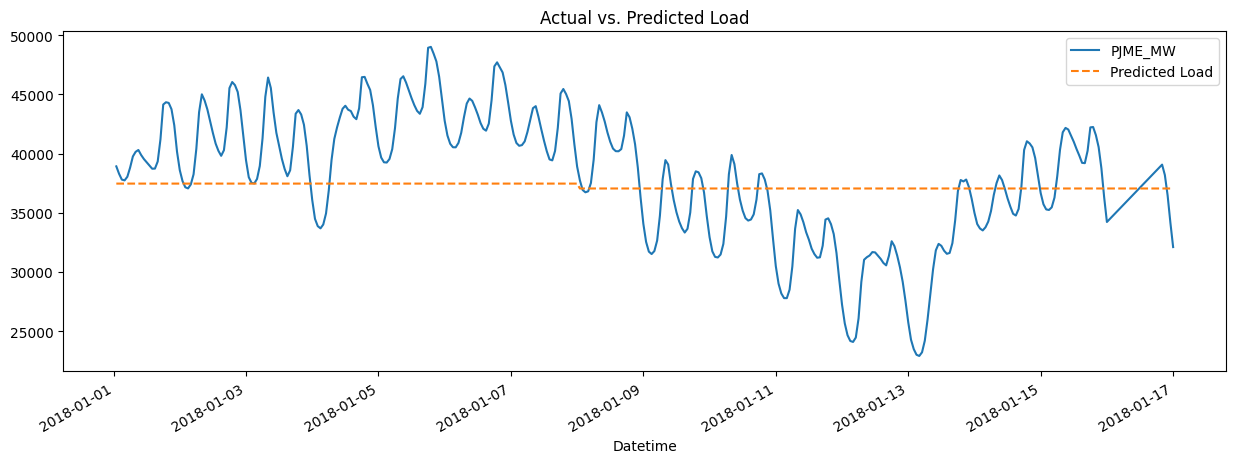

In [10]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with a datetime index and 'PJME_MW' column
train, test = train_test_split(data, test_size=365, shuffle=False)

# Convert the date index to numerical representation (e.g., days since the start)
train['date_numeric'] = (train.index - train.index.min()).days
test['date_numeric'] = (test.index - train.index.min()).days

# Create an XGBoost regressor instance (you can tune hyperparameters)
model = xgb.XGBRegressor()

# Train the model on the training data
X_train = train['date_numeric'].values.reshape(-1, 1)
y_train = train['PJME_MW']
model.fit(X_train, y_train)

# Make predictions on the test set
X_test = test['date_numeric'].values.reshape(-1, 1)
test['prediction'] = model.predict(X_test)

# Calculate RMSE as an example of an evaluation metric
rmse = mean_squared_error(test['PJME_MW'], test['prediction'], squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualization (plot actual vs. predicted)
fig, ax = plt.subplots(figsize=(15, 5))
test[['PJME_MW']].plot(ax=ax, label='Actual Load')
test['prediction'].plot(ax=ax, label='Predicted Load', linestyle='--')
ax.legend()
plt.title('Actual vs. Predicted Load')
plt.show()


# **Hourly Trends**

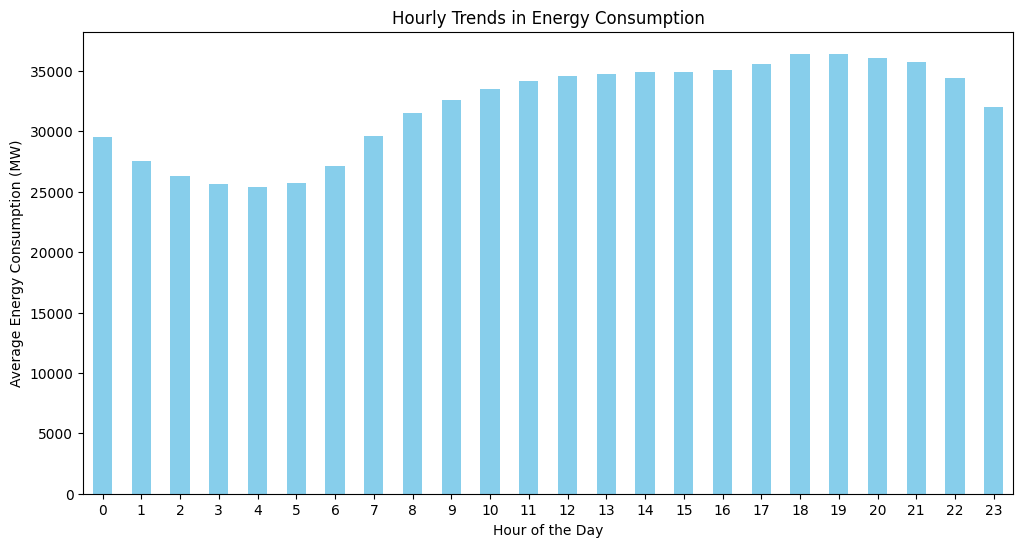

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with a datetime index and 'PJME_MW' column
data['hour'] = data.index.hour

# Calculate average energy consumption for each hour
hourly_avg = data.groupby('hour')['PJME_MW'].mean()

# Visualization (plot hourly trends)
plt.figure(figsize=(12, 6))
hourly_avg.plot(kind='bar', color='skyblue')
plt.title('Hourly Trends in Energy Consumption')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Consumption (MW)')
plt.xticks(rotation=0)
plt.show()


# **Daily Trends by Season:**

<Figure size 1500x800 with 0 Axes>

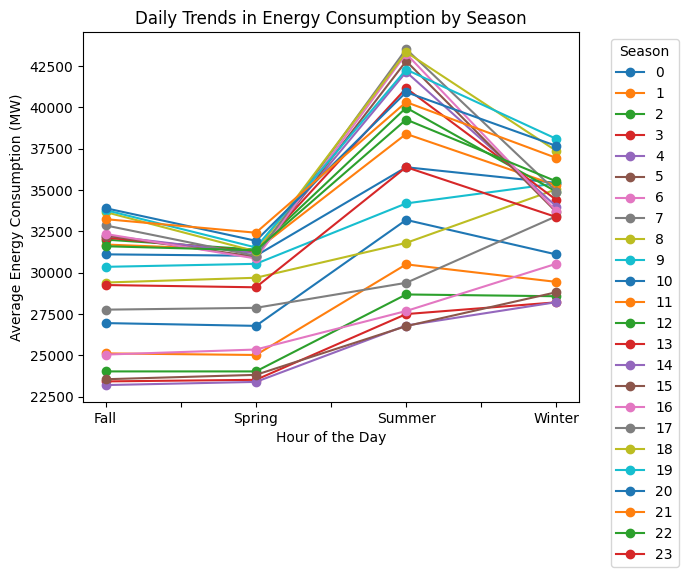

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with a datetime index and 'PJME_MW' column
data['hour'] = data.index.hour
data['month'] = data.index.month

# Define seasons based on months
seasons = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
}

# Map months to seasons
data['season'] = data['month'].map(seasons)

# Calculate average energy consumption for each hour and season
hourly_avg_season = data.groupby(['season', 'hour'])['PJME_MW'].mean().unstack()

# Visualization (plot daily trends by season)
plt.figure(figsize=(15, 8))
hourly_avg_season.plot(kind='line', marker='o')
plt.title('Daily Trends in Energy Consumption by Season')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Consumption (MW)')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()


# **Holiday and Special Event Analysis**

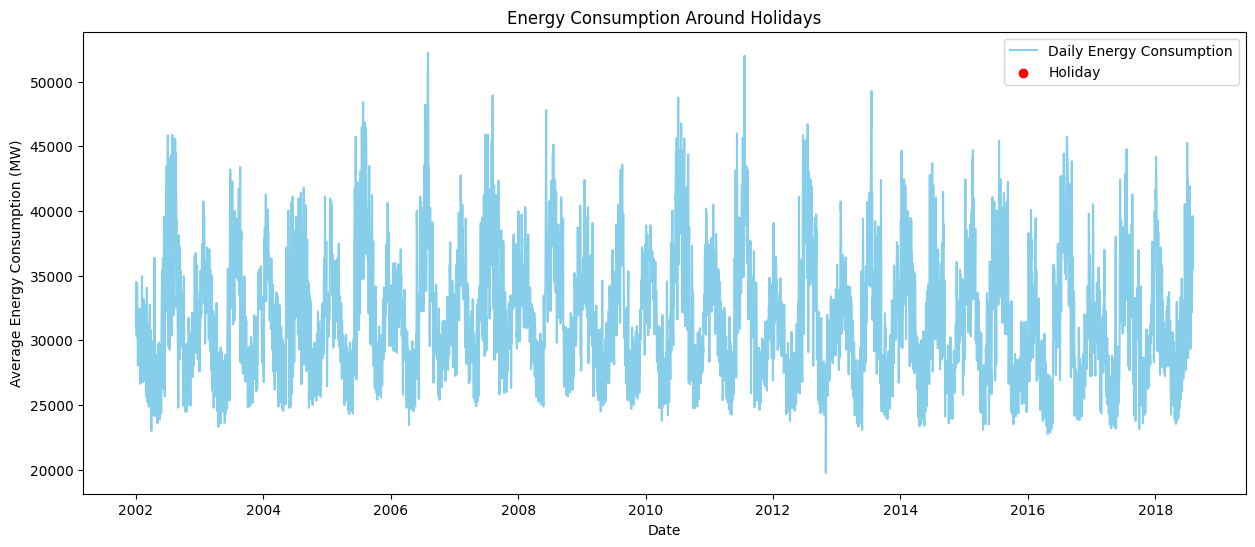

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with a datetime index and 'PJME_MW' column
data['date'] = data.index.date

# List of holidays (replace with your actual holiday dates)
holidays = ['2023-01-01', '2023-07-04', '2023-12-25']

# Mark holidays in the DataFrame
data['is_holiday'] = data['date'].isin(pd.to_datetime(holidays))

# Calculate average energy consumption for each day
daily_avg = data.groupby('date')['PJME_MW'].mean()

# Visualization (plot energy consumption around holidays)
plt.figure(figsize=(15, 6))
plt.plot(daily_avg.index, daily_avg.values, label='Daily Energy Consumption', color='skyblue')
plt.scatter(data[data['is_holiday']]['date'], data[data['is_holiday']]['PJME_MW'], color='red', label='Holiday')
plt.title('Energy Consumption Around Holidays')
plt.xlabel('Date')
plt.ylabel('Average Energy Consumption (MW)')
plt.legend()
plt.show()


# **Long-Term Trends:**

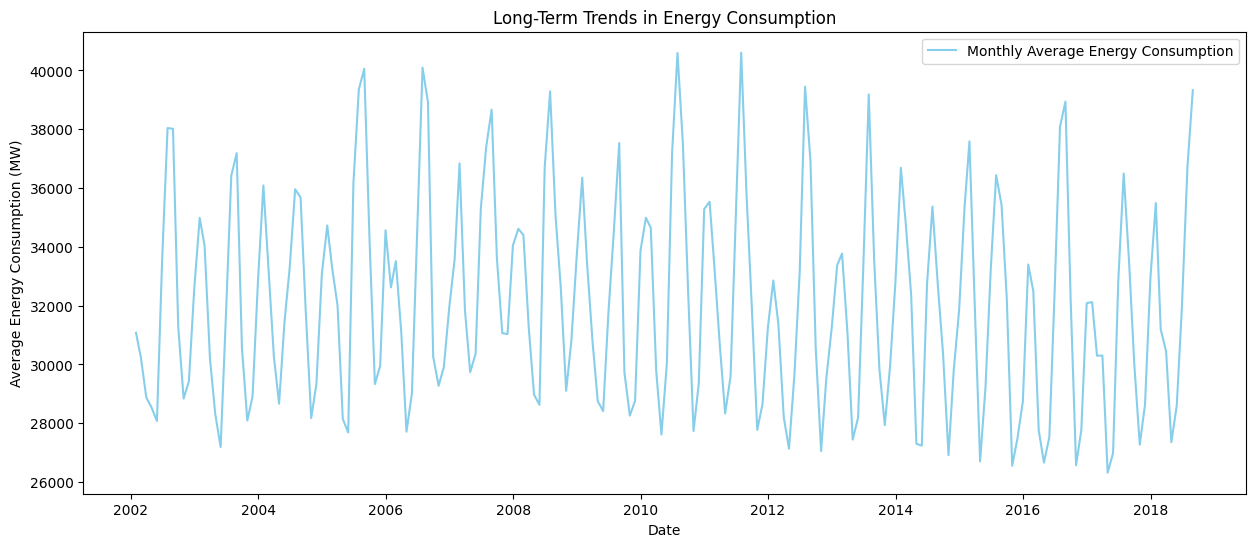

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with a datetime index and 'PJME_MW' column

# Calculate average energy consumption for each month
monthly_avg = data.resample('M')['PJME_MW'].mean()

# Visualization (plot long-term trends)
plt.figure(figsize=(15, 6))
plt.plot(monthly_avg.index, monthly_avg.values, label='Monthly Average Energy Consumption', color='skyblue')
plt.title('Long-Term Trends in Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Average Energy Consumption (MW)')
plt.legend()
plt.show()


# **Regional Analysis:**

<Figure size 1500x800 with 0 Axes>

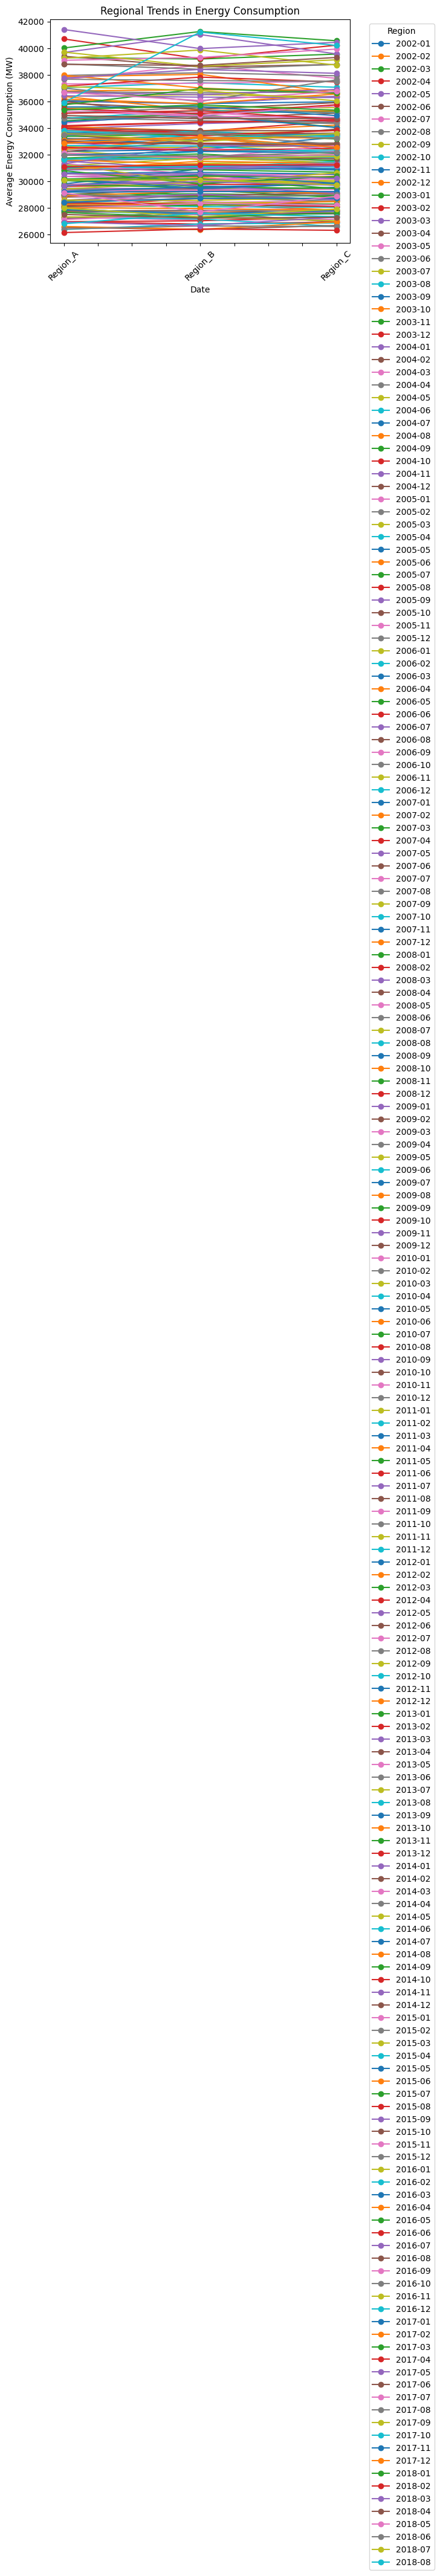

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data with 'region' column (replace with your actual data)
data['region'] = np.random.choice(['Region_A', 'Region_B', 'Region_C'], len(data))

# Calculate average energy consumption for each region and month
regional_monthly_avg = data.groupby(['region', data.index.to_period('M')])['PJME_MW'].mean().unstack()

# Visualization (plot regional trends)
plt.figure(figsize=(15, 8))
regional_monthly_avg.plot(kind='line', marker='o')
plt.title('Regional Trends in Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Average Energy Consumption (MW)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


# **Feature Engineering**

In [16]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame with a datetime index and 'PJME_MW' column

# Create a feature for the day of the week
data['day_of_week'] = data.index.dayofweek

# Create a feature for the hour of the day
data['hour_of_day'] = data.index.hour

# Create a feature for the month
data['month'] = data.index.month

# Calculate the rolling mean as a new feature (you can adjust the window size)
data['rolling_mean'] = data['PJME_MW'].rolling(window=7, min_periods=1).mean()

# Create a feature indicating whether it's a weekend (1) or not (0)
data['is_weekend'] = np.where(data['day_of_week'].isin([5, 6]), 1, 0)

# Display the updated DataFrame
print(data.head())


                     PJME_MW  AEP_MW_Lag1  AEP_MW_Lag2  AEP_MW_Lag3  \
Datetime                                                              
2002-12-31 04:00:00  24393.0      24574.0      25147.0      26498.0   
2002-12-31 05:00:00  24860.0      24393.0      24574.0      25147.0   
2002-12-31 06:00:00  26222.0      24860.0      24393.0      24574.0   
2002-12-31 07:00:00  28702.0      26222.0      24860.0      24393.0   
2002-12-31 08:00:00  30698.0      28702.0      26222.0      24860.0   

                     DayOfWeek  HourOfDay  Month  Year  Quarter  WeekOfYear  \
Datetime                                                                      
2002-12-31 04:00:00          1          4     12  2002        4           1   
2002-12-31 05:00:00          1          5     12  2002        4           1   
2002-12-31 06:00:00          1          6     12  2002        4           1   
2002-12-31 07:00:00          1          7     12  2002        4           1   
2002-12-31 08:00:00         

# **Anomaly Detection**

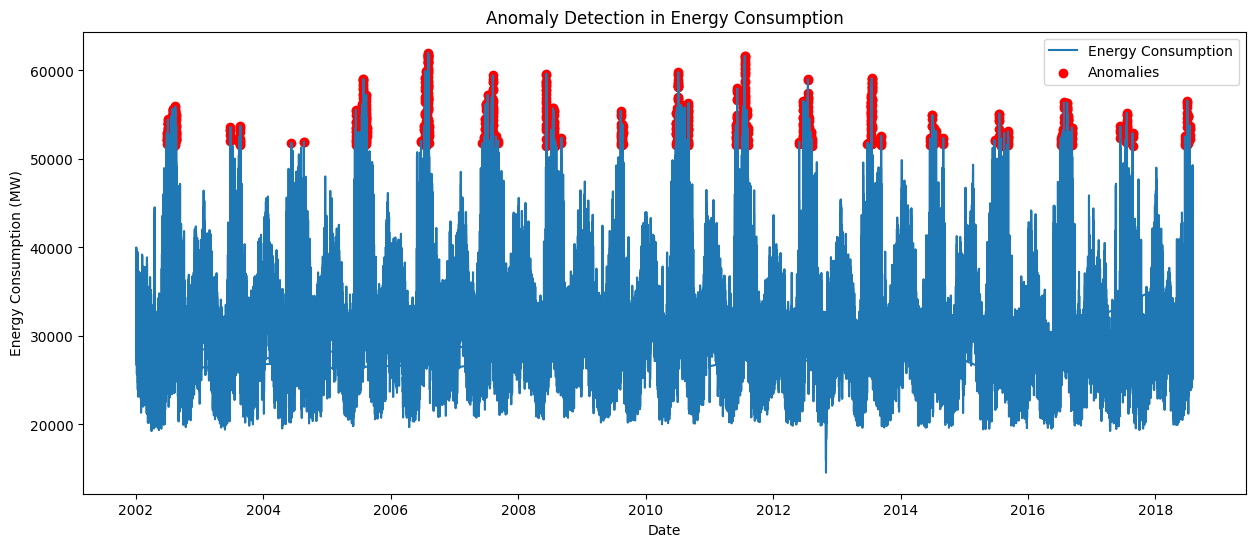

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with a datetime index and 'PJME_MW' column

# Calculate Z-score for 'PJME_MW' column
data['z_score'] = (data['PJME_MW'] - data['PJME_MW'].mean()) / data['PJME_MW'].std()

# Set a threshold for anomaly detection (adjust as needed)
threshold = 3

# Identify anomalies based on the threshold
data['is_anomaly'] = np.abs(data['z_score']) > threshold

# Visualization (plot anomalies)
plt.figure(figsize=(15, 6))
plt.plot(data.index, data['PJME_MW'], label='Energy Consumption')
plt.scatter(data[data['is_anomaly']].index, data[data['is_anomaly']]['PJME_MW'], color='red', label='Anomalies')
plt.title('Anomaly Detection in Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()


In [18]:
import os
print(os.getcwd())


/kaggle/working


In [19]:
import pickle



In [20]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [21]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [22]:
mp.predict(X_test)


array([37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  ,
       37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  ,
       37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  ,
       37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  ,
       37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  ,
       37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  ,
       37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  ,
       37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  ,
       37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  ,
       37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  ,
       37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  ,
       37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  ,
       37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  , 37056.9  ,
       37056.9  , 37056.9  , 37056.9  , 37056.9  , 